In [11]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [13]:
l12 = 1;
l23 = 2.93;
l2 = 2.71;
l3 = 1.64;
l4 = 2.07;
l5 = 1.93;
l6 = 5.43;

In [14]:
# all angles need to be in radians
# t3 is our "input" angle since this describes the angle that the CAM will eventually preturb
t3 = 0.4  # Example value just to be sure code runs like expected

def equations(x):
    t1, t2, t4, t5 = x
    e1x = l6 - l23 * np.cos(t1) + l4 * np.cos(t4) - l3 * np.cos(t3) + l5 * np.cos(t5)
    e1y = -l23 * np.sin(t1) + l4 * np.sin(t4) - l3 * np.sin(t3) + l5 * np.sin(t5)
    e2x = l3 * np.cos(t3) - l4 * np.cos(t4) - l12 * np.cos(t1) + l2 * np.cos(t2)
    e2y = l3 * np.sin(t3) - l4 * np.sin(t4) - l12 * np.sin(t1) + l2 * np.sin(t2)
    return [e1x, e1y, e2x, e2y]

# Initial guess
t1_guess = 0.0
t2_guess = 0.0
t4_guess = 0.0
t5_guess = 0.0
initial_guess = [t1_guess, t2_guess, t4_guess, t5_guess]
t_bounds = [(0, np.pi)]  # fsolve doesnt have bounds argument, but i would want these bounds if i could

# Solving the system of equations
solution = fsolve(equations, initial_guess)
print("Solution:")
print("t1 =", solution[0])
print("t2 =", solution[1])
print("t4 =", solution[2])
print("t5 =", solution[3])

Solution:
t1 = 19.032367764988944
t2 = 22.35061995740829
t4 = 22.233350961528092
t5 = 7.326611460926498


In [15]:
# Given angle inputs... torsion spring fully pressed at t3=0 and torsion spring fully relaxed at t3=pi/2
t3 = np.linspace(0,np.pi/2,100)

t1=[]
t2=[]
t4=[]
t5=[]

for i in t3:
    def equations(x):
        t1, t2, t4, t5 = x
        e1x = l6 - l23 * np.cos(t1) + l4 * np.cos(t4) - l3 * np.cos(i) + l5 * np.cos(t5)
        e1y = -l23 * np.sin(t1) + l4 * np.sin(t4) - l3 * np.sin(i) + l5 * np.sin(t5)
        e2x = l3 * np.cos(i) - l4 * np.cos(t4) - l12 * np.cos(t1) + l2 * np.cos(t2)
        e2y = l3 * np.sin(i) - l4 * np.sin(t4) - l12 * np.sin(t1) + l2 * np.sin(t2)
        return [e1x, e1y, e2x, e2y]

    # Initial guess
    t1_guess = 0.0
    t2_guess = 0.0
    t4_guess = 0.0
    t5_guess = 0.0
    initial_guess = [t1_guess, t2_guess, t4_guess, t5_guess]

    # Solving the system of equations
    solution = fsolve(equations, initial_guess)
    t1.append(solution[0]%(2 * np.pi))
    t2.append(solution[1]%(2 * np.pi))
    t4.append(solution[2]%(2 * np.pi))
    t5.append(solution[3]%(2 * np.pi))

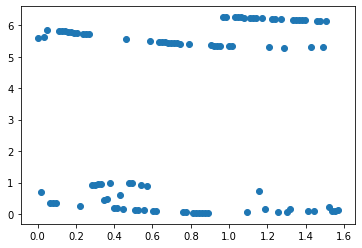

In [16]:
plt.scatter(t3,t1)

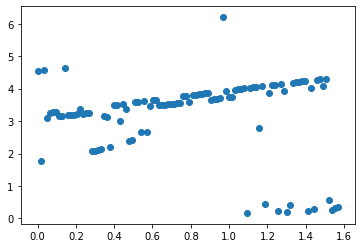

In [17]:
plt.scatter(t3,t2)

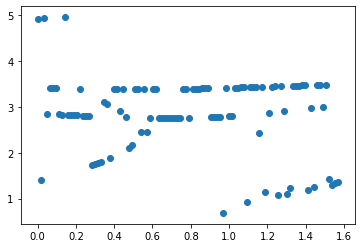

In [18]:
plt.scatter(t3,t4)

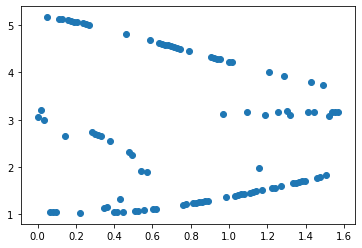

In [19]:
plt.scatter(t3,t5)